In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm
import concurrent.futures

In [11]:
#set matplotlib for jupyter
%matplotlib inline

In [12]:
#get all files in the folder recursively
FOLDER = "/root/ssh-rlkex/Generated_Graphs"
all_files = []
for root, dirs, files in os.walk(FOLDER):
    for file in files:
        if file.endswith(".graphml"):
            all_files.append(os.path.join(root, file))


In [13]:
def read_graph(file):
    G = nx.read_graphml(file)
    return G


In [14]:
all_graphs = []
with concurrent.futures.ProcessPoolExecutor() as executor:
    # Map the read_graph function to all files
    results = list(tqdm(executor.map(read_graph, all_files), total=len(all_files)))
    all_graphs.extend(results)


  0%|          | 0/8517 [00:00<?, ?it/s]

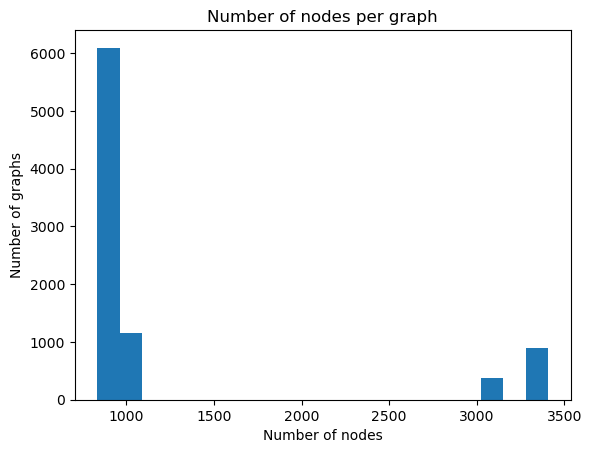

In [15]:
#nb of nodes of each graph
nb_nodes = [len(G.nodes) for G in all_graphs]

#plot the histogram
plt.hist(nb_nodes, bins=20)
plt.title("Number of nodes per graph")
plt.xlabel("Number of nodes")
plt.ylabel("Number of graphs")
plt.show()